<a href="https://colab.research.google.com/github/fridriscvski/Classificador_Cisteina/blob/main/Cisteina_Classificador_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
classes = os.listdir('dados')
column_names = (['nm','intensidade'])
merged = None
df_final = None

for classe in classes:
    if classe == ".DS_Store":
        continue
    files = os.listdir('dados/' + classe)
    for index, file in enumerate(files):
        path = "dados/" + classe + '/' + file
        df = pd.read_csv(path,sep="\t",
         header= None, names = column_names ,decimal=',', skiprows=17, skipfooter=1, engine='python')
        df = df.astype(float)
        merged = df if merged is None else pd.merge(merged, df, on='nm')
    merged_T = merged.T
    merged_T = pd.DataFrame(merged_T.values[1:], columns=merged_T.loc["nm"])
    merged_T["classe"] = classe                                                           #Matriz Transposta
    df_final = merged_T if df_final is None else pd.concat([df_final, merged_T])
    merged_T = None
    merged = None

print("\n FINAL \n")
df_classe = df_final["classe"]
df_final = df_final.iloc[: , :-80]                #Retirando Zonas de Incertezas
df_final = df_final.iloc[:,80:]
df_final["classe"] = df_classe


In [ ]:

df_final_out = df_final.reset_index().drop(['index'], axis=1)
df_final_out.head(90)

nm,224.64,225.1,225.56,226.03,226.49,226.95,227.42,227.88,228.34,228.8,...,1004.92,1005.28,1005.64,1005.99,1006.35,1006.71,1007.07,1007.43,1007.79,classe
0,0.515,0.507,0.514,0.481,0.491,0.489,0.505,0.496,0.486,0.475,...,0.036,0.060,0.066,-0.013,0.042,0.021,-0.012,-0.005,-0.014,Cisteina
1,0.684,0.695,0.678,0.673,0.648,0.630,0.645,0.633,0.615,0.606,...,0.067,0.133,0.075,0.043,0.052,0.153,0.187,0.079,0.073,Cisteina
2,1.112,1.073,1.041,1.022,1.020,1.024,0.994,0.986,0.960,0.953,...,0.252,0.390,0.318,0.264,0.278,0.315,0.278,0.119,0.237,Cisteina
3,1.083,1.039,1.033,1.039,1.004,0.994,0.974,0.952,0.920,0.919,...,0.299,0.314,0.334,0.351,0.156,0.258,0.316,0.331,0.237,Cisteina
4,0.686,0.671,0.655,0.658,0.633,0.627,0.621,0.637,0.596,0.597,...,0.100,0.078,0.112,0.079,0.146,0.190,0.165,-0.041,0.078,Cisteina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.560,0.553,0.561,0.551,0.536,0.527,0.544,0.530,0.511,0.526,...,0.100,0.230,0.119,0.050,0.055,0.131,0.040,0.060,0.024,Cisteina
86,1.829,1.822,1.827,1.835,1.727,1.720,1.647,1.734,1.648,1.616,...,0.013,0.170,0.100,0.053,-0.000,-0.043,-0.023,-0.076,-0.031,Acetilcisteina
87,1.702,1.806,1.753,1.679,1.679,1.621,1.537,1.604,1.455,1.432,...,0.044,0.046,0.023,0.011,-0.012,0.071,0.088,-0.067,-0.023,Acetilcisteina
88,1.804,1.688,1.657,1.598,1.638,1.593,1.504,1.527,1.412,1.450,...,0.034,0.054,0.132,-0.045,0.047,0.183,0.051,-0.033,0.031,Acetilcisteina


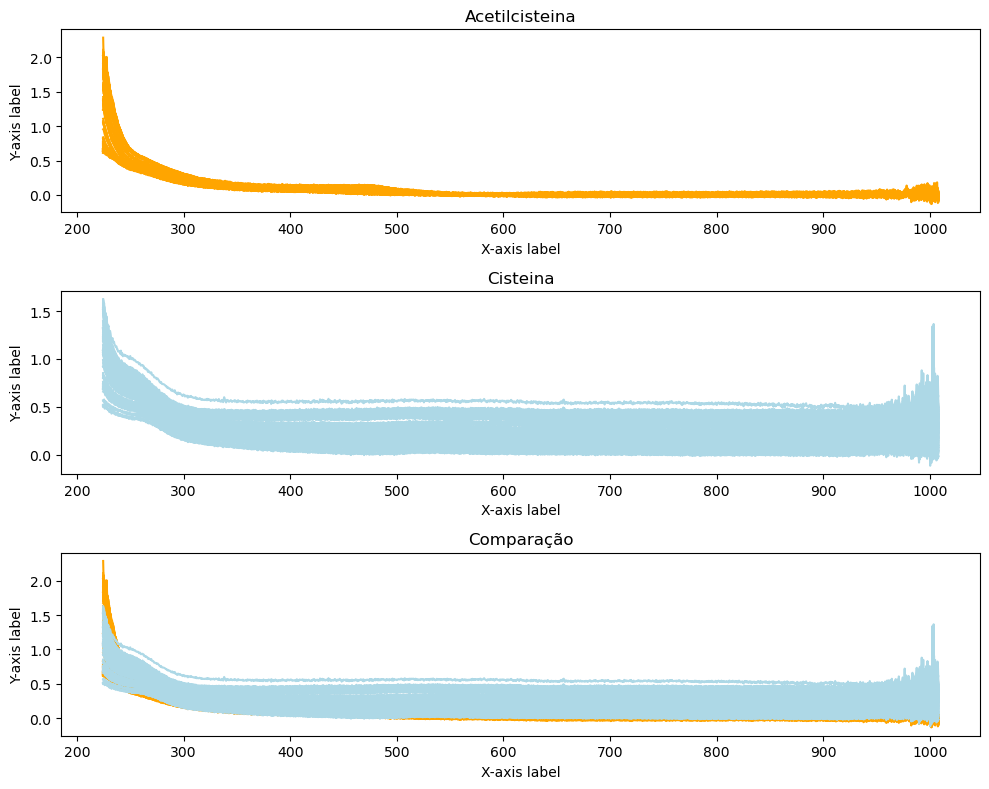

In [ ]:
grouped = df_final_out.groupby('classe')
dfs = {}
for name, group in grouped:
    dfs[name] = group.copy()

class_Cisteina_df = dfs['Cisteina']
class_Acetilcisteina_df = dfs['Acetilcisteina']

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(class_Acetilcisteina_df.drop(class_Acetilcisteina_df.columns[-1], axis=1).T, color='orange')
axs[1].plot(class_Cisteina_df.drop(class_Cisteina_df.columns[-1], axis=1).T, color='lightblue')
axs[2].plot(class_Acetilcisteina_df.drop(class_Acetilcisteina_df.columns[-1], axis=1).T, color='orange')
axs[2].plot(class_Cisteina_df.drop(class_Cisteina_df.columns[-1], axis=1).T, color='lightblue')


axs[0].set_title('Acetilcisteina')
axs[1].set_title('Cisteina')
axs[2].set_title('Comparação')
for ax in axs:
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')

plt.tight_layout()  # Adjusts layout to fit everything nicely
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

X = df_final.drop('classe', axis=1)
y = df_final['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


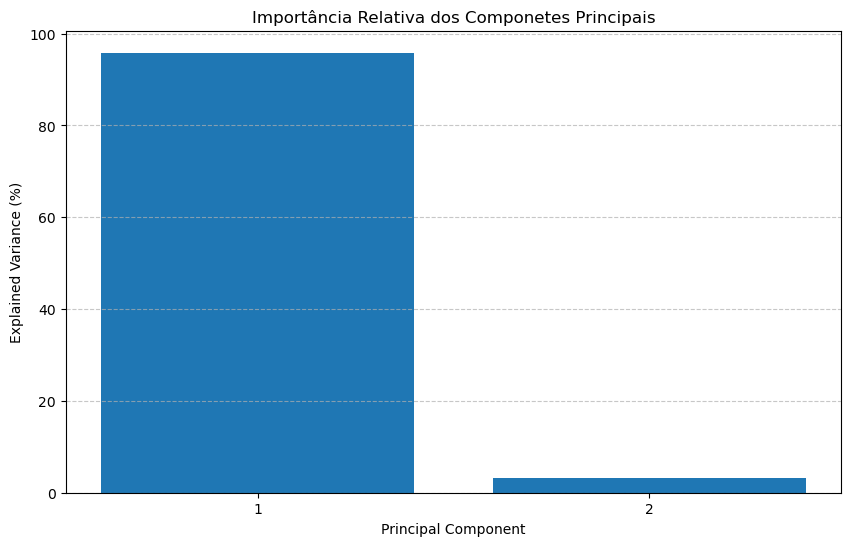

In [ ]:
explained_variances = (pca.explained_variance_ratio_)*100
plt.figure(figsize=(10, 6))
plt.bar(range(1, 3), explained_variances)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Importância Relativa dos Componetes Principais')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 3))
plt.show()

Text(0.5, 1.0, 'Test')

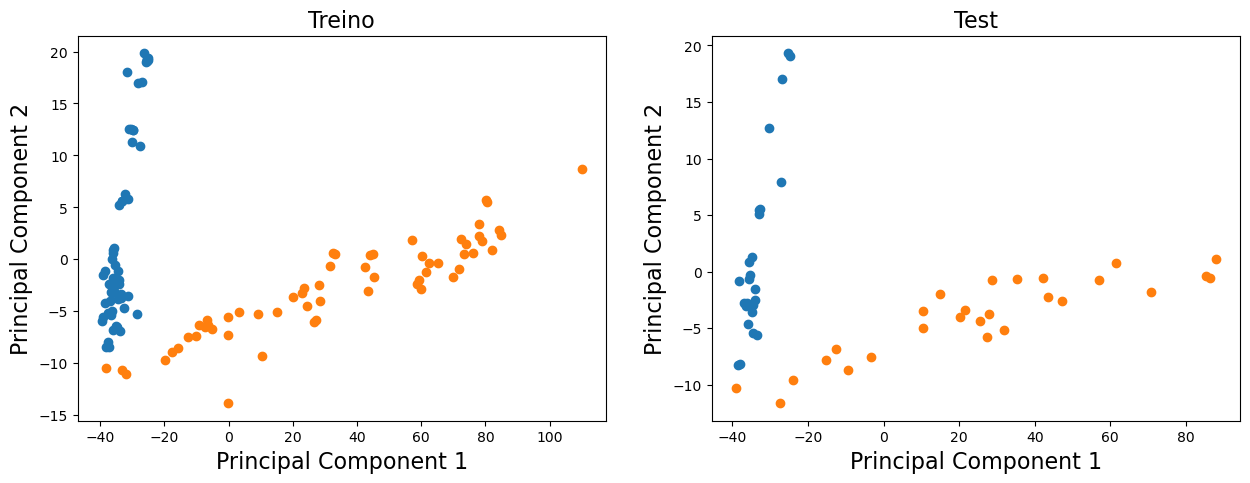

In [ ]:
data_pca_train = {
    'x1': X_train_pca[:, 0],
    'x2': X_train_pca[:, 1],
}

df_pca_train = pd.DataFrame(data_pca_train)
df_pca_train['classe'] = y_train.values

acetilcisteina_train = df_pca_train[df_pca_train['classe'] == 'Acetilcisteina']
cisteina_train = df_pca_train[df_pca_train['classe'] == 'Cisteina']

data_pca_test = {
    'x1': X_test_pca[:, 0],
    'x2': X_test_pca[:, 1],
}

df_pca_test = pd.DataFrame(data_pca_test)
df_pca_test['classe'] = y_test.values

acetilcisteina_test = df_pca_test[df_pca_test['classe'] == 'Acetilcisteina']
cisteina_test = df_pca_test[df_pca_test['classe'] == 'Cisteina']

_, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].title.set_text('Treino')
axs[0].scatter(acetilcisteina_train['x1'], acetilcisteina_train['x2'])
axs[0].scatter(cisteina_train['x1'], cisteina_train['x2'])
axs[1].title.set_text('Test')
axs[1].scatter(acetilcisteina_test['x1'], acetilcisteina_test['x2'])
axs[1].scatter(cisteina_test['x1'], cisteina_test['x2'])
axs[0].set_xlabel('Principal Component 1',fontsize=16)
axs[0].set_ylabel('Principal Component 2',fontsize=16)
axs[1].set_xlabel('Principal Component 1',fontsize=16)
axs[1].set_ylabel('Principal Component 2',fontsize=16)
axs[0].set_title('Treino', fontsize=16)
axs[1].set_title('Test', fontsize=16)





/Users/marcosfridriscvski/opt/anaconda3/envs/testeconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


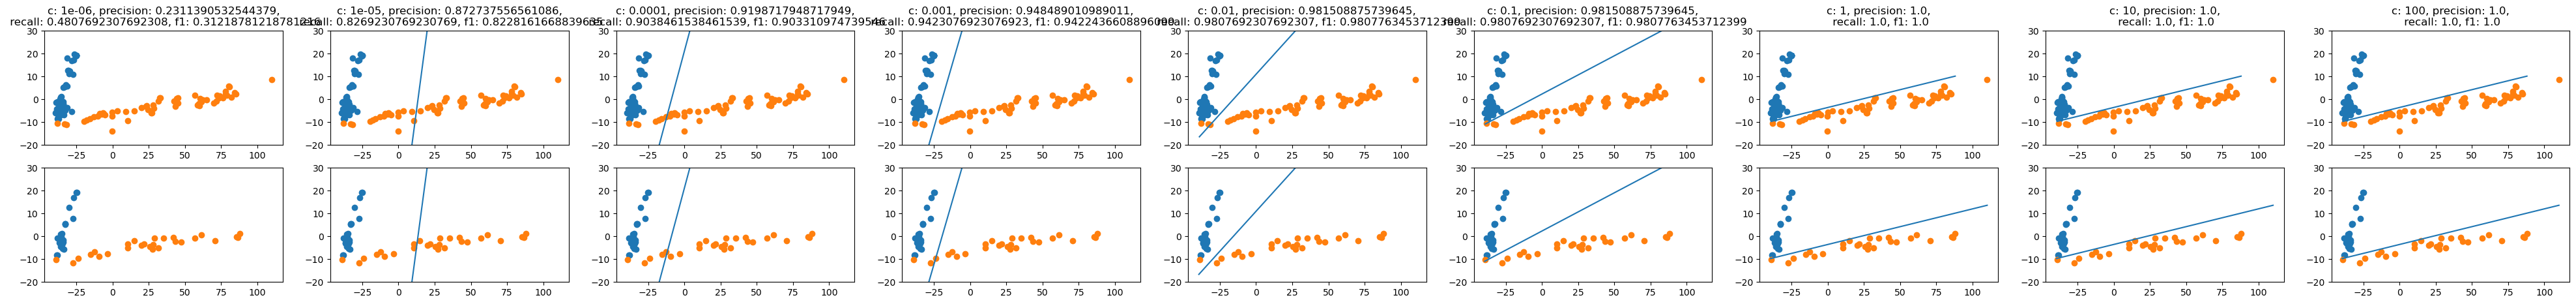

In [ ]:
cs = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 10, 100]
_, axs = plt.subplots(2, 9, figsize=(50, 5))

for index, c in enumerate(cs):
    model = SVC(kernel='linear', C=c)
    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    ## plot train
    axs[0, index].scatter(acetilcisteina_train['x1'], acetilcisteina_train['x2'])
    axs[0, index].scatter(cisteina_train['x1'], cisteina_train['x2'])
    axs[0, index].title.set_text(f'c: {c}, precision: {precision},\n recall: {recall}, f1: {f1}')

    w = model.coef_[0]
    a =  -w[0] / w[1]
    xx = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max())
    b = model.intercept_[0] / w[1]
    yy = a * xx - b

    axs[0, index].plot(xx, yy)
    axs[0, index].set_ylim([-20, 30])

    ## plot test

    axs[1, index].scatter(acetilcisteina_test['x1'], acetilcisteina_test['x2'])
    axs[1, index].scatter(cisteina_test['x1'], cisteina_test['x2'])

    w = model.coef_[0]
    a =  -w[0] / w[1]
    xx = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max())
    b = model.intercept_[0] / w[1]
    yy = a * xx - b

    axs[1, index].plot(xx, yy)
    axs[1, index].set_ylim([-20, 30])

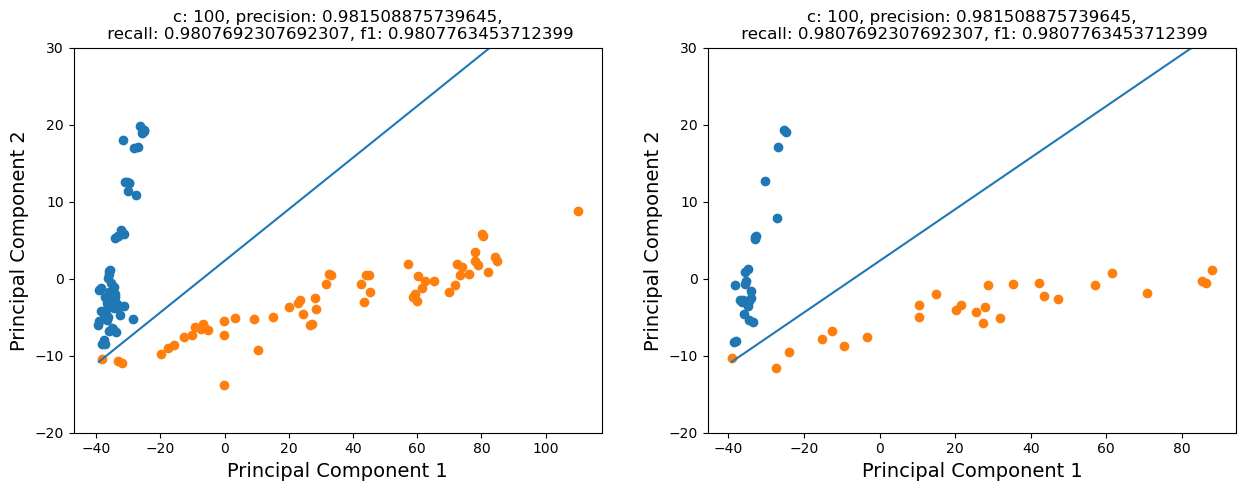

In [ ]:


# Select the value of C you want to plot
c_to_plot = 0.1

# Create the SVM model for the selected C value
model = SVC(kernel='linear', C=c_to_plot)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a figure with one row and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training data and decision boundary in the first subplot
axs[0].scatter(acetilcisteina_train['x1'], acetilcisteina_train['x2'])
axs[0].scatter(cisteina_train['x1'], cisteina_train['x2'])

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max())
b = model.intercept_[0] / w[1]
yy = a * xx - b

axs[0].plot(xx, yy)
axs[0].set_ylim([-20, 30])
axs[0].title.set_text(f'c: {c}, precision: {precision},\n recall: {recall}, f1: {f1}')

# Plot the testing data and decision boundary in the second subplot
axs[1].scatter(acetilcisteina_test['x1'], acetilcisteina_test['x2'])
axs[1].scatter(cisteina_test['x1'], cisteina_test['x2'])

# Compute the decision boundary for the testing data
w_test = model.coef_[0]
a_test = -w_test[0] / w_test[1]
xx_test = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max())
b_test = model.intercept_[0] / w_test[1]
yy_test = a_test * xx_test - b_test

axs[1].plot(xx_test, yy_test)
axs[1].set_ylim([-20, 30])
axs[1].title.set_text(f'c: {c}, precision: {precision},\n recall: {recall}, f1: {f1}')
axs[0].set_xlabel('Principal Component 1',fontsize=14)
axs[0].set_ylabel('Principal Component 2',fontsize=14)
axs[1].set_xlabel('Principal Component 1',fontsize=14)
axs[1].set_ylabel('Principal Component 2',fontsize=14)

# Show the plot with both subplots
plt.show()

